In [36]:
from test_fastSimulation import *
import scipy;
import matplotlib.pyplot as plt;
from bokeh.io import output_notebook
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.CDSCompress import *
from bokeh.io import curdoc
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [37]:
df=loadData("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.list")

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root


In [38]:
display(df)

,pullFullIn3,pullFullRefit2,gxIn,paramFullIn3,pullFullRefit3,paramFullRefit3,pullFullMC3,gyIn,paramFullRefit4,paramFullMC1,...,paramFullIn1,pullFullMC4,statusMaskFullOut,pullFullMC1,statusMaskFullRefit,paramFullMC2,paramFullMC0,ptMC,tglMC,fPdgCodeMC
0,-0.831445,0.245103,-0.000000,0.722124,-0.831445,0.722124,0.0,0.000000,11.782081,0.000000,...,0.043191,0.0,0.0,0.0,9216,8.044140e-17,-0.000000e+00,0.08626,0.731155,211.0
1,-1.371967,-1.916192,-0.255622,0.710100,-1.774094,0.707186,0.0,0.966777,11.671165,0.732888,...,0.839057,0.0,8255.0,0.0,12288,-4.038369e-03,-6.404841e-15,0.08626,0.731155,211.0
2,-0.588364,-1.994435,-0.498008,0.712921,-0.752171,0.712711,0.0,1.932875,11.697992,1.457846,...,1.527136,0.0,8255.0,0.0,12288,-1.690061e-02,-3.812055e-15,0.08626,0.731155,211.0
3,-0.654594,-1.761783,-0.721878,0.714999,-1.927754,0.705447,0.0,2.903611,11.670630,2.175637,...,2.225151,0.0,8255.0,0.0,12288,-2.807849e-02,3.445161e-15,0.08626,0.731155,211.0
4,-0.716162,-1.375648,-0.926651,0.712128,-1.751694,0.706595,0.0,3.878848,11.687814,2.896565,...,2.958104,0.0,8255.0,0.0,12288,-3.887870e-02,-3.694961e-15,0.08626,0.731155,211.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607455,-1.391628,-0.329676,44.932794,-0.914684,-1.002496,-0.873890,0.0,53.314914,18.232288,-70.769951,...,-70.664322,0.0,8255.0,0.0,12288,-8.902960e-01,1.776357e-14,0.06153,-0.872109,0.0
607456,-1.685108,-0.345300,47.119147,-0.922737,-1.602990,-0.878205,0.0,52.736179,18.311913,-72.708115,...,-72.676926,0.0,8255.0,0.0,12288,-9.019756e-01,-1.731948e-14,0.06153,-0.872109,0.0
607457,-1.125915,-0.778708,49.396709,-0.937075,0.397331,-0.879880,0.0,51.991829,18.429457,-74.747421,...,-74.319817,0.0,8255.0,0.0,12288,-9.124612e-01,3.330669e-14,0.06153,-0.872109,0.0
607458,-0.462929,0.509398,51.766907,-0.955887,2.536101,-0.889356,0.0,51.060964,18.533787,-77.003372,...,-76.852890,0.0,8255.0,0.0,12288,-9.319855e-01,-3.108624e-14,0.06153,-0.872109,0.0


In [39]:
varIn=["fPdgCodeMC","paramFullMC2","paramFullMC3","paramFullMC4","NPointsFullRefit"]
target="pullFullRefit4"
n_estimators=200
n_jobs=10
nPoints=500000
max_depthBase=14
max_samples=0.05

regressor = RandomForestRegressor(n_estimators =n_estimators,n_jobs=n_jobs,max_depth=max_depthBase,max_samples=max_samples)
#dfFit=df.query("(statusMaskFullRefit&0x2000)>0")
dfFit0=df[((df["statusMaskFullRefit"]&0x1000)>0)].query(f"abs({target})<10")
dfFit1=dfFit0.sample(frac=0.05).sort_index()
#
#
nAll=dfFit1.shape[0]
regressor.fit(dfFit1[varIn].iloc[:nAll//2], dfFit1[target].iloc[:nAll//2])
dfFit1[f"{target}Pred0"]=regressor.predict(dfFit1[varIn])

In [40]:
train_diff = (dfFit1[f"{target}"]-dfFit1[f"{target}Pred0"]).iloc[nAll//2:]
check_diff = ((dfFit1[f"{target}"]-dfFit1[f"{target}Pred0"]).iloc[:nAll//2])

mean = -0.03568516668500608   sigma = 1.1019445882482564


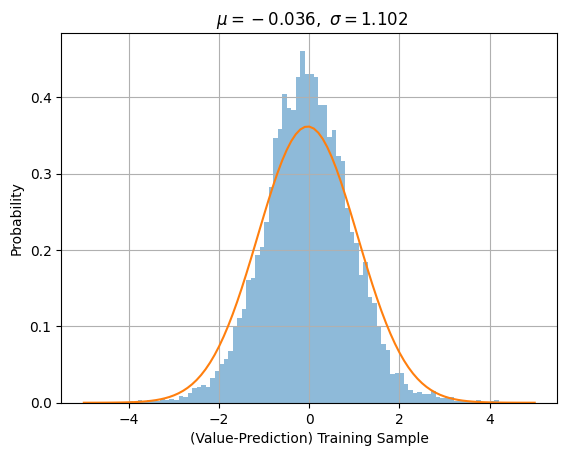

In [41]:
_, bins, _ = plt.hist(train_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(train_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Training Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
print("mean =",str(mu),"  sigma =",str(sigma))

mean = -0.002076469977503608   sigma = 0.9598023739512436


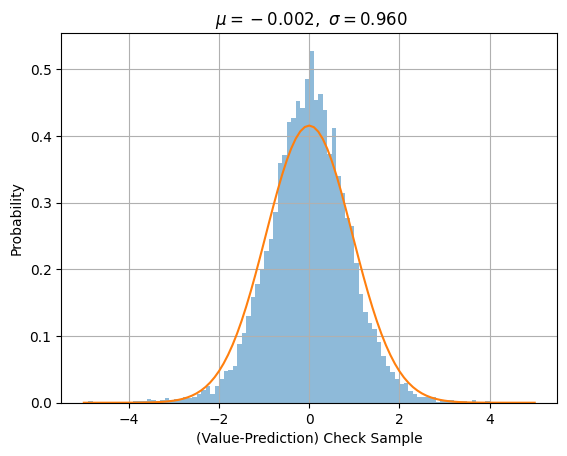

In [42]:
_, bins, _ = plt.hist(check_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(check_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Check Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
print("mean =",str(mu),"  sigma =",str(sigma))

In [43]:
histoArray = [
    {"name": "histoRes0", "variables": ["pullFullRefit0"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes1", "variables": ["pullFullRefit1"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes2", "variables": ["pullFullRefit2"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes3", "variables": ["pullFullRefit3"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes4", "variables": ["pullFullRefit4"], "nbins": 100, "range": [-6, 6]}
    ]

figureArray = [
    [['pullFullRefit0'], ["histoRes0"],{}],
    [['pullFullRefit1'], ["histoRes1"],{}],
    [['pullFullRefit2'], ["histoRes2"],{}],
    [['pullFullRefit3'], ["histoRes3"],{}],
    [['pullFullRefit4'], ["histoRes4"],{}],
    ["tableHisto", {"rowwise": False}],
    ['table'],
    {"size": 1}   
    ]

widgetParams = [
    ['range', ['paramFullMC2']],
    ['range', ['paramFullMC3']],
    ['range', ['paramFullMC4']],
    ['range', ['NPointsFullRefit']],
    ['select', ['fPdgCodeMC']],
    ['select', ['statusMaskFullRefit']]
    
]

widgetLayoutDesc=[ [0,1],[2,3],[4,5], {'sizing_mode':'scale_width'} ]
figureLayoutDesc=[
    [0,1,2,3,4, {'plot_height':800}],
    {'plot_height':1000,'sizing_mode':'scale_width'}
]
tooltips = [("ptMC","@ptMC")]
output_file("fastMCKalmanResiduals.html")

figC=bokehDrawSA.fromArray(df,"abs(fPdgCodeMC)<100000", figureArray, widgetParams,
                           layout=figureLayoutDesc,sizing_mode='scale_width',
                           widgetLayout=widgetLayoutDesc,nPointRender=5000,
                           rescaleColorMapper=True,histogramArray=histoArray)

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/RootInteractive/RootInteractive/InteractiveDrawing/bokeh/bokehTools.py:1408: FutureWarning: Specifying `na_sentinel=None` is deprecated, specify `use_na_sentinel=False` instead.
  codes, optionsPlot = pd.factorize(dfCategorical, sort=True, na_sentinel=None)


11
4
